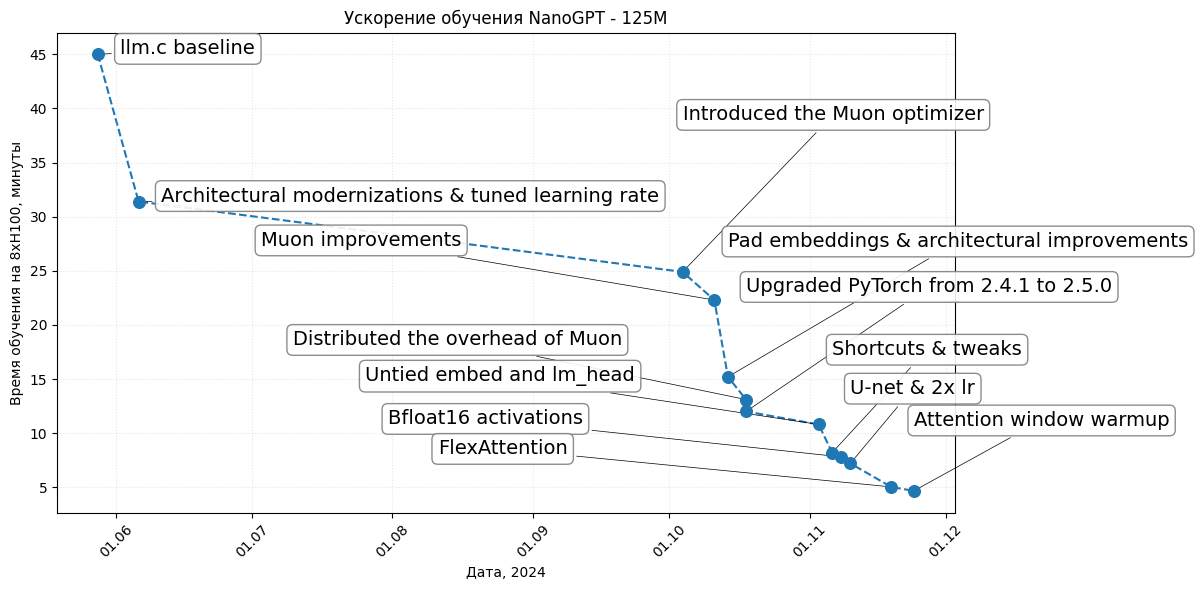

In [ ]:
# Re-import necessary libraries and re-define data since the execution state was reset
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# Data from the table
data = {
    "Record Time (minutes)": [45, 31.4, 24.9, 22.3, 15.2, 13.1, 12.0, 10.8, 8.2, 7.8, 7.2, 5.03, 4.66],
    "Description": [
        "llm.c baseline",
        "Architectural modernizations & tuned learning rate",
        "Introduced the Muon optimizer",
        "Muon improvements",
        "Pad embeddings & architectural improvements",
        "Distributed the overhead of Muon",
        "Upgraded PyTorch from 2.4.1 to 2.5.0",
        "Untied embed and lm_head",
        "Shortcuts & tweaks",
        "Bfloat16 activations",
        "U-net & 2x lr",
        "FlexAttention",
        "Attention window warmup"
    ],
    "Date": [
        "05/28/24", "06/06/24", "10/04/24", "10/11/24", "10/14/24", "10/18/24", "10/18/24", 
        "11/03/24", "11/06/24", "11/08/24", "11/10/24", "11/19/24", "11/24/24"
    ]
}

# Convert to a DataFrame
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%y")

# Sort the data by date to ensure proper plotting
df = df.sort_values("Date")

# Prepare data for plotting
dates = df["Date"]
times = df["Record Time (minutes)"]
descriptions = df["Description"]

# Adjust the plot to spread labels further and use more of the available space
plt.figure(figsize=(12, 6))
plt.plot(dates, times, linestyle="--", zorder=0)
plt.scatter(dates, times, label="Training Time", marker="o", s=70, zorder=100)

# Add labels with arrows for clear separation, spreading them out further
for i, (date, time, desc) in enumerate(zip(dates, times, descriptions)):
    # Larger offset for labels
    if i <= 1:
        y_offset = 0
        x_offset = pd.Timedelta(days=5)
    elif desc == "U-net & 2x lr":
        y_offset = 16 if i % 2 == 0 else 7
        y_offset = int(y_offset*(1 - i/20))*0.8
        x_offset = pd.Timedelta(days=0 if i % 2 == 0 else -100)
    else:
        y_offset = 16 if i % 2 == 0 else 7
        y_offset = int(y_offset*(1 - i/20))
        x_offset = pd.Timedelta(days=0 if i % 2 == 0 else -100)
    # Plot the arrow
    plt.annotate(
        desc,
        xy=(date, time),
        xytext=(date + x_offset, time + y_offset),
        arrowprops=dict(facecolor='black', arrowstyle="-", lw=0.5),
        fontsize=14,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.9, zorder=-100)
    )

# Formatting the plot
plt.title("Ускорение обучения NanoGPT - 125M")
plt.xlabel("Дата, 2024")
plt.ylabel("Время обучения на 8xH100, минуты")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))
plt.gca().xaxis.set_major_locator(mda tes.MonthLocator())
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle=":")
# plt.legend()
plt.tight_layout()

# Show the plot
plt.savefig("nanogpt_speedrun.pdf")
plt.show()
